## Ames Housing Sale Price Data Analysis - Refine & Build

### Problem and hypothesis
- The aim of this project is to predict Sale Price of houses in Ames, Iowa. Individual housing sale price data is available between the period of 2006 and 2010. This information will be used to identify the factors that contribute significantly to the Sale Price. An algorithm will be established to predict the house price in Ames with minimal error. 
    - Background info: Ames has a population of 62,000 and the 9th best place to live in USA. There is robust/stable economy and the average temperature is 9.6 degree Celsius.
    - Null Hypothesis: Sale Price is not likely to have any relationship with the indepenent variables available from Ames Housing dataset.
    - Alternate hypothesis: Sale Price is likely to have relationship with the independent variables available from Ames Housing dataset.

### Data
- Housing data of individual house sales in Ames have been collected over the period from 2006 to 2010. 
- Kaggle dataset for Ames Housing contain 1460 observations and 81 variables. Variables include 20 continuous variables and 61 categorical variables. Dependent variable Sale Price is a continuous variable.

### Summary of Exploratory findings
There is relationship between independent variables and the dependent variable Sale Price from analysing Ames Housing dataset. Null hypothesis has been rejected. Alternate hypothesis is taken forward. 

Completed Ordinary Least Squares linear regression using Continuous variables and then added-on relevant Categorical variables that appeared to have the most correlation with the variance of SalePrice by reviewing boxplots. This resulted in Adjusted R squared values starting from 0.673 and improving to 0.822.

Applied log transformation to independent variables as the original pairplot appeared to be funneling for larger SalePrice figures. However this did not make any improvements to the correlation of independent variables and SalePrice. This also reduced the Adjusted R squared value. Therefore the original data will be used for further analysis and data transformation will not be relevant here.

#### Independent variables that have significant relationship with SalePrice include:

Continuous variables: 
"TotalBsmtSF",
"GrLivArea",
"GarageArea",
"MasVnrArea"

Categorical variables:
"Neighborhood",
"KitchenQual",
"Fireplaces",
"OverallCond"

P-values for all the above variables are well below 0.05 and therefore statistically significant. Adjusted R squared value 0.822. 82.2% of the variance of SalePrice can be related to the independent variables mentioned here.

Null hypothesis has been rejected and alternative hypothesis will be analysed further inorder to predict Sale Price.


### Import Librabries, Read Dataset and Clean data

In [19]:
# Import all the libraries required for data analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import sklearn.linear_model

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import operator as op
sns.set_style("darkgrid")

In [20]:
# Read data file called AmesHousingTrain.csv
#wd = "../dataset/"
#wd = "dataset/"
#HousingData = pd.read_csv(wd + "AmesHousingTrain.csv")
HousingData = pd.read_csv("AmesHousingTrain.csv")
HousingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
# Replacing null values with mean value of that column - MasVnrArea, LotFrontage, GarageYrBlt
HousingData['MasVnrArea'].fillna((HousingData['MasVnrArea'].mean()), inplace=True)
HousingData['LotFrontage'].fillna((HousingData['LotFrontage'].mean()), inplace=True)
HousingData['GarageYrBlt'].fillna((HousingData['GarageYrBlt'].mean()), inplace=True)
HousingData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Linear Regression - OLS - Continuous Variables

In [22]:
# Linear regression model using continuous variables - Model 1
import statsmodels.formula.api as smf

X = HousingData[["TotalBsmtSF","GrLivArea","GarageArea","MasVnrArea"]] #Adj R sq 0.673
y = HousingData["SalePrice"]

# create a fitted model in one line
# formula notation is the equivalent to writting out our models such that "outcome = predictor"
# with the follwing syntax formula = "outcome ~ predictor1 + predictor2 ... predictorN"
lm = smf.ols(formula = "y ~ X", data = HousingData).fit()


# print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     751.8
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:27:42   Log-Likelihood:                -17726.
No. Observations:                1460   AIC:                         3.546e+04
Df Residuals:                    1455   BIC:                         3.549e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.538e+04   4153.999     -3.702      0.000     -2.35e+04 -7228.677
X[0]          45.3637      3.288     13.797      0.000        38.914    51.813
X[1]          64.5487      2.743     23.535      0.000        59.169    69.929
X[2]          94.9464      6.815     13.931      0.000        81.578   108.315
X[3]          54.0135      7.450      7.251      0.000        39.400    68.627
==============================================================================
Omnibus:                      789.842   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70534.498
Skew:                          -1.612   Prob(JB):                         0.00
Kurtosis:                      36.898   Cond. No.                     7.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### OLS Regression Results - Continuous variables X[0] to X[3]:
All independent variables in this linear model TotalBsmtSF,GrLivArea,GarageArea represented by X[0] to X[2] are statistically significant with a p-value less than 0.05.

- X[0] TotalBsmtSF: For each unit of increase in TotalBsmtSF there is an increase of 45.3 dollars in SalePrice
- X[1] GrLivArea: For each unit of increase in GrLivArea there is an increase of 64.5 dollars in SalePrice
- X[2] GarageArea: For each unit of increase in GarageArea there is an increase of 94.9 dollars in SalePrice

Adjusted R squared of 0.661 show that 66.1% of SalePrice variance can be explained by these independent variables.

Added X[3] MasVnrArea to the regression model. This has increased the Adj R squared to 0.673. P value is less than 0.05.
- X[3] MasVnrArea: For each unit of increase in MasVnrArea there is an increase of 54.0 dollars in SalePrice


1stFlrSF and 2ndFlrSF were validated with this model and found to be statistically insignificant as expected.

### Linear Regression - OLS - Continuous and Categorical Variables

In [23]:
# Creating dummy variables for the Categorical variables to analyse the relationship of that with SalePrice
cols_to_keep = ["TotalBsmtSF","GrLivArea","GarageArea","MasVnrArea"] # Continuous variables
# Categorical variables
dummy_neigh=pd.get_dummies(HousingData["Neighborhood"],prefix="Neigh")
dummy_kitch=pd.get_dummies(HousingData["KitchenQual"],prefix="Kitch")
dummy_fire=pd.get_dummies(HousingData["Fireplaces"],prefix="Fire")
dummy_overall=pd.get_dummies(HousingData["OverallCond"],prefix="Overall")

#dummy_overall.head()

DataDummy = HousingData[cols_to_keep].join(dummy_neigh.ix[:, "Neigh_Blueste":]).join(dummy_kitch.ix[:, "Kitch_Fa":]).join(dummy_fire.ix[:, "Fire_1":]).join(dummy_overall.ix[:, "Overall_2":]).join(HousingData['SalePrice'])
DataDummy.head()

,TotalBsmtSF,GrLivArea,GarageArea,MasVnrArea,Neigh_Blueste,Neigh_BrDale,Neigh_BrkSide,Neigh_ClearCr,Neigh_CollgCr,Neigh_Crawfor,...,Fire_3,Overall_2,Overall_3,Overall_4,Overall_5,Overall_6,Overall_7,Overall_8,Overall_9,SalePrice
0,856,1710,548,196.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,208500
1,1262,1262,460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,920,1786,608,162.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223500
3,756,1717,642,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140000
4,1145,2198,836,350.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,250000


In [24]:
#Linear regression model using continuous and categorical variables - Model 2 
X=DataDummy.ix[:,:"Overall_9"]
y=DataDummy['SalePrice']
linearmodel2 = smf.ols(formula = "y ~ X", data = DataDummy).fit()

# print the full summary
linearmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     161.7
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:27:42   Log-Likelihood:                -17262.
No. Observations:                1460   AIC:                         3.461e+04
Df Residuals:                    1417   BIC:                         3.484e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.095e+04   3.56e+04      2.554      0.011      2.11e+04  1.61e+05
X[0]          27.1983      2.672     10.178      0.000        21.956    32.440
X[1]          50.2762      2.385     21.081      0.000        45.598    54.955
X[2]          41.6770      5.611      7.428      0.000        30.671    52.684
X[3]          20.6850      6.037      3.426      0.001         8.843    32.527
X[4]       -2.521e+04   2.53e+04     -0.995      0.320     -7.49e+04  2.45e+04
X[5]       -3.323e+04   1.23e+04     -2.709      0.007     -5.73e+04 -9163.866
X[6]       -2.431e+04   9779.392     -2.486      0.013     -4.35e+04 -5131.325
X[7]        2304.5902   1.06e+04      0.217      0.828     -1.85e+04  2.31e+04
X[8]        7375.3418   8707.468      0.847      0.397     -9705.572  2.45e+04
X[9]       -1250.9164   9843.623     -0.127      0.899     -2.06e+04  1.81e+04
X[10]      -2.899e+04   9242.500     -3.137      0.002     -4.71e+04 -1.09e+04
X[11]       8266.7892   9122.687      0.906      0.365     -9628.634  2.62e+04
X[12]      -3.812e+04   1.03e+04     -3.685      0.000     -5.84e+04 -1.78e+04
X[13]      -3.384e+04   1.19e+04     -2.840      0.005     -5.72e+04 -1.05e+04
X[14]      -1.125e+04   9738.671     -1.156      0.248     -3.04e+04  7849.438
X[15]      -2.299e+04   8839.088     -2.601      0.009     -4.03e+04 -5654.753
X[16]       -1.76e+04   1.41e+04     -1.253      0.211     -4.52e+04  9964.428
X[17]      -1.834e+04   9388.403     -1.954      0.051     -3.68e+04    74.454
X[18]        5.97e+04   1.01e+04      5.900      0.000      3.99e+04  7.96e+04
X[19]       4.964e+04   9314.095      5.330      0.000      3.14e+04  6.79e+04
X[20]      -4.311e+04   9294.671     -4.638      0.000     -6.13e+04 -2.49e+04
X[21]      -3.978e+04   1.11e+04     -3.591      0.000     -6.15e+04 -1.81e+04
X[22]      -2.038e+04   9380.926     -2.173      0.030     -3.88e+04 -1980.669
X[23]      -1063.4731   9356.848     -0.114      0.910     -1.94e+04  1.73e+04
X[24]        2.08e+04   9046.610      2.300      0.022      3057.070  3.85e+04
X[25]        6.49e+04   1.07e+04      6.081      0.000       4.4e+04  8.58e+04
X[26]       1.856e+04   9902.472      1.875      0.061      -860.115   3.8e+04
X[27]       2.227e+04   1.31e+04      1.694      0.091     -3519.715  4.81e+04
X[28]      -6.498e+04   7455.689     -8.716      0.000     -7.96e+04 -5.04e+04
X[29]      -5.132e+04   4150.012    -12.367      0.000     -5.95e+04 -4.32e+04
X[30]      -6.261e+04   4628.823    -13.527      0.000     -7.17e+04 -5.35e+04
X[31]       7853.8751   2200.501      3.569      0.000      3537.286  1.22e+04
X[32]       2.884e+04   3841.068      7.508      0.000      2.13e+04  3.64e+04
X[33]      -7.011e+04   1.58e+04     -4.446      0.000     -1.01e+05 -3.92e+04
X[34]      -8006.7052   3.72e+04     -0.215      0.830     -8.09e+04  6.49e+04
X[

#### OLS Regression Results - Continuous and Categorical variables X[0] to X[41]:

Continuous variables are represented by X[0] to X[3] - TotalBsmtSF,GrLivArea,GarageArea,MasVnrArea

Added Categorical predictor Neighborhood X[4] to X[27]: Adjusted R squared value has improved to 0.772. 77.2% of variance in SalePrice can now be related to the independent variables chosen. P-values for some of the Neighborhoods are statistically significant: X[4] BrDale, X[5] BrkSide, X[10] Edwards, X[12] IDOTRR, X[18] to X[21] NoRidge, NRidgHt, OldTown, SWISU and X[25] StoneBr.

Added Categorical predictor KitchenQual X[28] to X[30]: Adjusted R squared value has improved to 0.801. 80.1% of variance in SalePrice can now be related to the independent variables chosen. P-values for KitchenQual are statistically significant, well below 0.05.

Added Categorical predictor Fireplaces X[31] to X[33]: Adjusted R squared value has improved to 0.812. 81.2% of variance in SalePrice can now be related to the independent variables chosen. P-values for Fireplaces are statistically significant, well below 0.05.

Adding categorical predictor YearRemodAdd only increased adjusted R squared value slightly to 0.818. Considering the large number of dummy variables (60) associated with this, removed this variable from the regression model inorder to reduce the complexity.

Adding categorical predictor OverallCond X[34] to X[41]: Adjusted R squared value has improved to 0.821. One P-value is lower than 0.05.

Added continuous predictor MasVnrArea X[3]: Adjusted R squared value has improved to 0.822. P-value is lower than 0.05.

#### Key contributors to SalePrice

- For every unit increase of X[0] to X[3], there is an increase of SalePrice by 27, 50, 41 and 20 dollars respectively. X[0] to X[3] represent TotalBsmtSF, GrLivArea, GarageArea and MasVnrArea.

- X[31] which represents Fireplace2 has significant increase in SalePrice compared to Fireplace1. There is an increase of 7854 dollars in this scenario.

### Train and Test Data Validation

In [25]:
# Train and Test Data split
# X represent independent variables and y represent SalePrice
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1) #default split 75% train and 25% test

print X_test.head()
print y_test.head()

      TotalBsmtSF  GrLivArea  GarageArea  MasVnrArea  Neigh_Blueste  \
258           963       1792         564       172.0            0.0   
267           720       2192         240         0.0            0.0   
288           882        900         280        31.0            0.0   
649           630        630           0         0.0            0.0   
1233         1188       1188         531       180.0            0.0   

      Neigh_BrDale  Neigh_BrkSide  Neigh_ClearCr  Neigh_CollgCr  \
258            0.0            0.0            0.0            1.0   
267            0.0            0.0            0.0            0.0   
288            0.0            0.0            0.0            0.0   
649            0.0            0.0            0.0            0.0   
1233           0.0            0.0            0.0            0.0   

      Neigh_Crawfor    ...      Fire_2  Fire_3  Overall_2  Overall_3  \
258             0.0    ...         0.0     0.0        0.0        0.0   
267             0.0    ...

In [26]:
#Linear model - fit Train data inorder to predict on Test data
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_train,y_train)
print linreg.intercept_
print linreg.coef_

115039.430243
[  2.58476899e+01   4.92213460e+01   4.13586747e+01   1.87923605e+01
  -3.64510247e+04  -3.68165594e+04  -2.97435106e+04   4.05059482e+03
   3.39791741e+03  -6.33748051e+03  -3.61288299e+04   2.79197379e+03
  -4.26245004e+04  -4.11624945e+04  -1.71394377e+04  -2.70879324e+04
  -2.28398066e+04  -2.17700656e+04   4.70699808e+04   5.07350468e+04
  -5.12543927e+04  -4.68253465e+04  -2.82931399e+04  -5.31485016e+03
   1.51377322e+04   6.59996035e+04   1.65352565e+04   2.87218679e+03
  -6.08604356e+04  -5.12619532e+04  -6.23092145e+04   7.88387305e+03
   2.85622153e+04  -9.13812217e+04  -2.57943161e+04  -2.41527627e+04
  -1.62347706e+04  -1.87695767e+03   5.73563988e+03   1.19802177e+04
   1.21881459e+04   3.81548037e+04]


In [27]:
# Predicting from test set
y_pred = linreg.predict(X_test)

# View first 10 results
print "y test - Actual SalePrice" # first 10 values from y_test - actual SalePrice
print (y_test[0:11])
print "\n","y Predictions - Predicted SalePrice"
print (y_pred[0:11]) #first 10 predictions - predicted SalePrice

y test - Actual SalePrice
258     231500
267     179500
288     122000
649      84500
1233    142000
167     325624
926     285000
831     151000
1237    195000
426     275000
487     175000
Name: SalePrice, dtype: int64

y Predictions - Predicted SalePrice
[ 212836.86569664  173453.75855754  101819.98417745   64596.85374069
  138291.42152665  357309.46900405  352679.68273666  171464.6444992
  208908.14992466  210884.20645308  176123.78692742]


### Root Mean Squared Error (RMSE) Analysis

In [28]:
# Square root of Mean squared error - RMSE
from sklearn import metrics
print "RMSE is ",np.sqrt(metrics.mean_squared_error(y_test,y_pred))

RMSE is  32552.0464857


Root Mean Squared Error value show that there is a variance of 32552 dollars between Actual SalePrice and Predicted SalePrice.

#### K-fold Cross validation

In [29]:
# K-fold cross validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(linreg, X, y, cv=10, scoring='mean_squared_error')
print scores

[ -7.08066772e+08  -7.56387565e+08  -8.11812412e+08  -1.70579104e+09
  -2.03853270e+09  -8.19447942e+08  -9.97557846e+08  -7.83290117e+08
  -3.44243423e+09  -7.24062803e+08]


In [30]:
# fix the sign of MSE scores
mse_scores = -scores
print mse_scores

[  7.08066772e+08   7.56387565e+08   8.11812412e+08   1.70579104e+09
   2.03853270e+09   8.19447942e+08   9.97557846e+08   7.83290117e+08
   3.44243423e+09   7.24062803e+08]


[ 26609.52407762  27502.50106791  28492.32198816  41301.22324367
  45150.11297537  28626.00116018  31584.13915711  27987.32064511
  58672.26115565  26908.41510253]


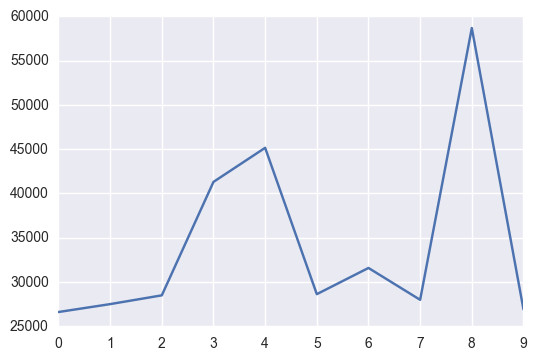

In [31]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print rmse_scores
plt.plot(rmse_scores)

In [32]:
# calculate the average RMSE
print "RMSE is", rmse_scores.mean()

RMSE is 34283.3820573


K-fold RMSE value show that there is a variance of 34283 dollars between Actual SalePrice and Predicted SalePrice. It will be ideal to reduce this RMSE.
Random Forest will be good regression model for this as it can also provide a list of features of importance. This will help identify any features that may have been missed from the modeling so far.

### Random Forest Regression

In [33]:
# read dataset
#wd = "../dataset/"
#wd = "dataset/"
HousingDataRF = pd.read_csv("AmesHousingTrain.csv")
y=HousingDataRF.pop("SalePrice")
yRF=y

#### Numerical Variables

In [34]:
#Selecting numercial variables
NumericalVariables = list(HousingDataRF.dtypes[HousingDataRF.dtypes != "object"].index)
HousingDataRF[NumericalVariables].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [35]:
HousingDataRF.describe()

C:\Users\miche\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [36]:
# Display sum of null values
HousingDataRF[NumericalVariables].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [37]:
# Replacing null values with the mean value of that feature
HousingDataRF[NumericalVariables]=HousingDataRF[NumericalVariables].apply(lambda x: x.fillna(x.mean()))

In [38]:
# Display new sum of null values
HousingDataRF[NumericalVariables].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [39]:
# X data
HousingDataRF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [40]:
# y data - SalePrice
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Random Forest Regression - Numerical Variables

In [41]:
# Random Forest Regression - Numercial Variables
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
HousingDataRF.head()
model.fit(HousingDataRF[NumericalVariables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [42]:
# In regression oob_score_ attribute gives R squared value using oob predictions. Closer to 1 scores are better.
model.oob_score_

0.85202610125134592

#### Categorical Variables

In [43]:
# Function - Descriptive stats on Categorical Variables
def describe_categorical(HousingDataRF):
    from IPython.display import display, HTML
    display (HTML(HousingDataRF[HousingDataRF.columns[HousingDataRF.dtypes == "object"]].describe().to_html()))

In [44]:
# Call the function to display the Categorical Variables description
describe_categorical(HousingDataRF)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [45]:
#Selecting Categorical Variables
CategoricalVariables = list(HousingDataRF.dtypes[HousingDataRF.dtypes == "object"].index)
HousingDataRF[CategoricalVariables].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [46]:
# Fill missing data, create dummy variables, drop main variable and add all these to the dataset
for variable in CategoricalVariables:
    
    # Fill missing data with the word Missing
    HousingDataRF[variable].fillna("Missing",inplace=True)
    
    # create array of dummies
    dummies=pd.get_dummies(HousingDataRF[variable], prefix=variable)
    
    # Update dataset to include dummies and drop main variable
    HousingDataRF = pd.concat([HousingDataRF,dummies], axis=1)
    HousingDataRF.drop([variable], axis=1, inplace=True)

In [47]:
HousingDataRF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Random Forest Regression - Numerical and Categorical Variables

In [48]:
# Random Forest Regression
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(HousingDataRF, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [49]:
# In regression oob_score_ attribute gives R squared value using oob predictions
model.oob_score_

0.85426304034218159

oob_score or R squared value has only improved from 0.852 to 0.854 after adding Categorical variables. This model needs to be tuned further for improved results.

### Random Forest - Features of importance

In [50]:
model.feature_importances_

array([  4.43153365e-03,   1.87427010e-03,   6.40492863e-03,
         1.21898795e-02,   5.80193308e-01,   4.05463010e-03,
         8.68497170e-03,   6.89264040e-03,   5.68499174e-03,
         3.03086516e-02,   6.40401151e-04,   4.19269246e-03,
         3.69697853e-02,   2.44474242e-02,   2.86751129e-02,
         1.12229791e-04,   1.10669259e-01,   6.32975236e-04,
         1.97145459e-04,   7.97619252e-03,   1.33611056e-03,
         1.72695375e-03,   4.87823085e-04,   6.12163725e-03,
         2.60029828e-03,   4.77598899e-03,   2.56173228e-02,
         1.22128353e-02,   4.23227717e-03,   4.11558701e-03,
         6.43122516e-04,   2.50235689e-04,   5.88056503e-04,
         3.43491505e-05,   4.30216739e-05,   3.17871104e-03,
         1.25268018e-03,   2.46004713e-04,   5.26358710e-05,
         2.41148787e-05,   5.56125685e-04,   1.61068618e-03,
         4.03598048e-06,   7.72645881e-07,   2.33841011e-05,
         3.59294261e-04,   2.43147024e-05,   3.33338597e-04,
         4.20639769e-04,

C:\Users\miche\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


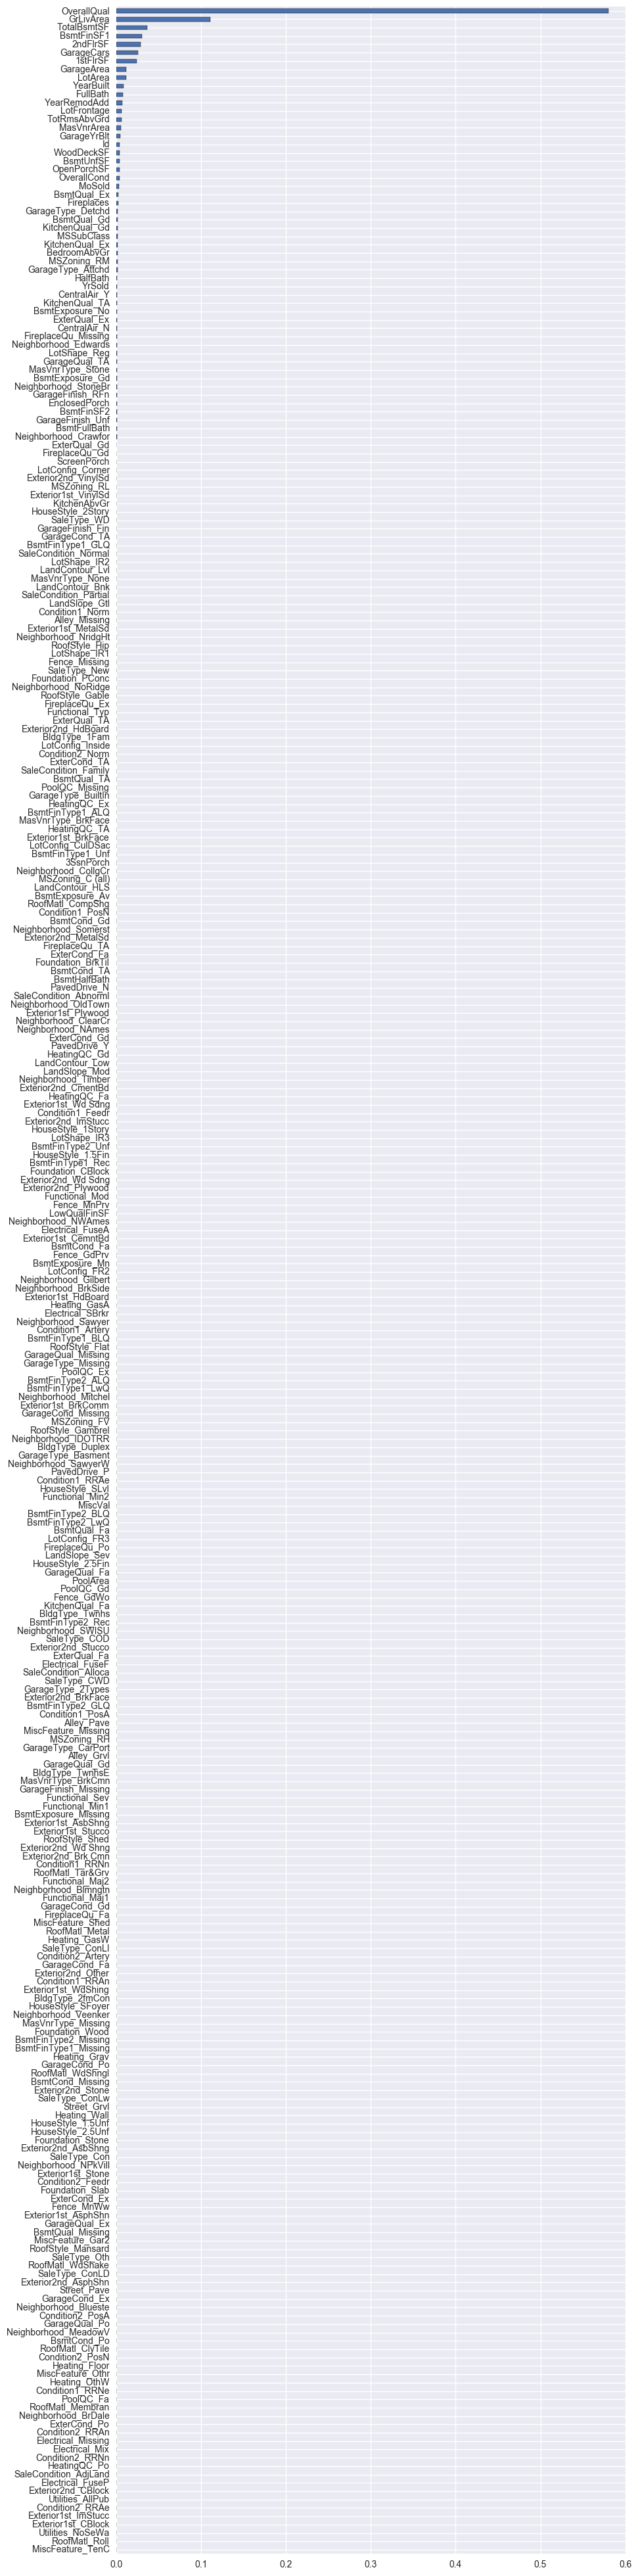

In [51]:
# Features of importance in order and readable format
feature_importances = pd.Series(model.feature_importances_, index=HousingDataRF.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(10,50))

OverallQual is the most important feature contributing close to 0.6, followed by GrLivArea, TotalBsmtSF, BsmtFinSF1 and so on.

In [52]:
# Random forest - features of importance in ascending order
features = HousingDataRF.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({"Features": features, "Importance Score": feature_importances})
features_df.sort_values("Importance Score", inplace = True, ascending = False)

features_df
features_df.head()

,Features,Importance Score
4,OverallQual,0.580193
16,GrLivArea,0.110669
12,TotalBsmtSF,0.036970
9,BsmtFinSF1,0.030309
14,2ndFlrSF,0.028675


In [53]:
features_df.head(35)

,Features,Importance Score
4,OverallQual,0.580193
16,GrLivArea,0.110669
12,TotalBsmtSF,0.036970
9,BsmtFinSF1,0.030309
14,2ndFlrSF,0.028675
26,GarageCars,0.025617
13,1stFlrSF,0.024447
27,GarageArea,0.012213
3,LotArea,0.012190
6,YearBuilt,0.008685


### Random Forest - Parameter Tuning

#### n_jobs - Performance measure

In [54]:
%%timeit
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=1, random_state=42)
model.fit(HousingDataRF, y)

1 loop, best of 3: 3.23 s per loop


In [55]:
%%timeit
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(HousingDataRF, y)

1 loop, best of 3: 853 ms per loop


n_jobs of -1 show improved performance timing from 3.21s down to 852ms

#### n_estimators - Number of trees

30 trees
OOB Score 0.841436567043

50 trees
OOB Score 0.850776069986

100 trees
OOB Score 0.854263040342

200 trees
OOB Score 0.857460842736

300 trees
OOB Score 0.860242591996

400 trees
OOB Score 0.86211198444

500 trees
OOB Score 0.863037377283

1000 trees
OOB Score 0.861712931231

2000 trees
OOB Score 0.862303557664



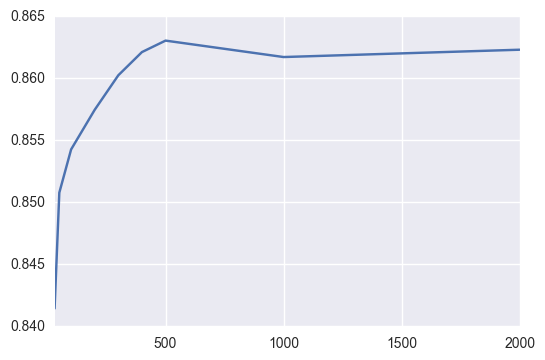

In [56]:
# n_estimators
results = []
n_estimator_options = [30,50,100,200,300,400,500,1000,2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(n_estimators=trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(HousingDataRF, y)
    print trees, "trees"
    oob_score_result=model.oob_score_
    print "OOB Score", oob_score_result
    results.append(oob_score_result)
    print ""
    
pd.Series(results, n_estimator_options).plot()

Best R squared outcome of 0.863 at 500 trees 

#### max_features - Maximum number of features to be used for each split

auto option
OOB Score 0.863037377283

None option
OOB Score 0.863037377283

sqrt option
OOB Score 0.848633329493

0.9 option
OOB Score 0.865404666156

0.7 option
OOB Score 0.867349826669

0.5 option
OOB Score 0.869365362813

0.2 option
OOB Score 0.867449814788



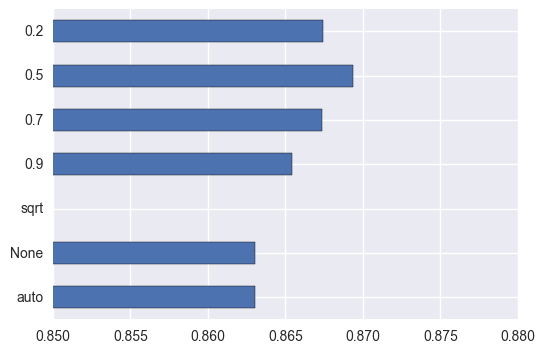

In [57]:
# max_features
results = []
max_feature_options = ['auto', None, 'sqrt', 0.9, 0.7, 0.5,0.2]

for max_feature in max_feature_options:
    model = RandomForestRegressor(n_estimators=500, oob_score=True, n_jobs=-1, random_state=42, max_features=max_feature)
    model.fit(HousingDataRF, y)
    print max_feature, "option"
    oob_score_result=model.oob_score_
    print "OOB Score", oob_score_result
    results.append(oob_score_result)
    print ""
    
pd.Series(results, max_feature_options).plot(kind="barh", xlim=(.85,.88))

Best R squared outcome of 0.869 at 0.5 features (50% of features) 

#### min_samples_leaf - Minimum number of samples at the leaf end

1 min_samples
OOB Score 0.869365362813

2 min_samples
OOB Score 0.867119372016

3 min_samples
OOB Score 0.863199824218

4 min_samples
OOB Score 0.859059300048

5 min_samples
OOB Score 0.855876187815

6 min_samples
OOB Score 0.854469592329

7 min_samples
OOB Score 0.852967279193

8 min_samples
OOB Score 0.852579213128

9 min_samples
OOB Score 0.849339279537

10 min_samples
OOB Score 0.84693538935



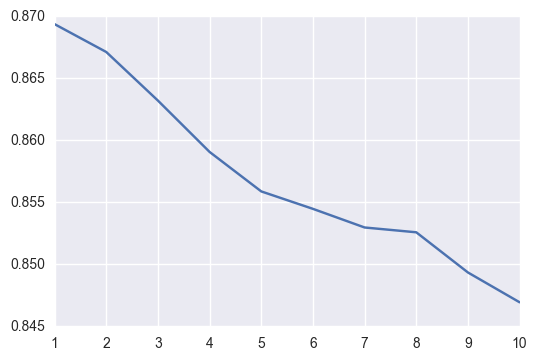

In [58]:
# min_samples_leaf
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=500, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=0.5,
                                  min_samples_leaf=min_samples)
    model.fit(HousingDataRF, y)
    print min_samples, "min_samples"
    oob_score_result=model.oob_score_
    print "OOB Score", oob_score_result
    results.append(oob_score_result)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot()

Best R squared outcome of 0.869 at 1 min samples leaf

### Final Random Forest Model using the best tuned parameters

In [59]:
#Final model
model = RandomForestRegressor(n_estimators=500, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=0.5,
                                  min_samples_leaf=1)
model.fit(HousingDataRF, y)
oob_score_result=model.oob_score_
print "OOB Score or R Squared result", oob_score_result

OOB Score or R Squared result 0.869365362813


### Train and Test Data

In [60]:
# Train and Test Data split
from sklearn.cross_validation import train_test_split
X = HousingDataRF #y is SalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1) #default split 75% train and 25% test


print X_test.head()
print y_test.head()

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
258    259          60    80.000000    12435            7            5   
267    268          75    60.000000     8400            5            8   
288    289          20    70.049958     9819            5            5   
649    650         180    21.000000     1936            4            6   
1233  1234          20    70.049958    12160            5            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1          ...            \
258        2001          2001       172.0         361          ...             
267        1939          1997         0.0         378          ...             
288        1967          1967        31.0         450          ...             
649        1970          1970         0.0         131          ...             
1233       1959          1959       180.0        1000          ...             

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
258      

### Predict test data

In [61]:
# Fit Train data and predict using Test data
model.fit(X_train, y_train)
y_predRF=model.predict(X_test)

print "y test"
print y_test[0:11]
print "\ny Prediction"
print y_predRF[0:11]

y test
258     231500
267     179500
288     122000
649      84500
1233    142000
167     325624
926     285000
831     151000
1237    195000
426     275000
487     175000
Name: SalePrice, dtype: int64

y Prediction
[ 210663.752  170052.164  119104.976   82668.044  151377.192  336319.968
  305306.118  147206.786  222037.     237642.964  174685.934]


In [62]:
#Random Forest Coefficient of determination - R squared
model.score(X_test,y_test)

0.89225977233951037

In [63]:
# Square root of Mean squared error - RMSE
from sklearn import metrics
print "RMSE is", np.sqrt(metrics.mean_squared_error(y_test,y_predRF))

RMSE is 26893.9531714


R squared value has increased to 0.89 and the RMSE has reduced by over 6000 dollars down to 26894 dollars. Random Forest regression has improved the results.

### Linear Regression adding extra features from Random Forest features of importance - Continuous Variables

In [64]:
# Linear regression model using numerical variables - Model 3
import statsmodels.formula.api as smf

#X = HousingData[["TotalBsmtSF","GrLivArea","GarageArea","MasVnrArea"]] #Adj R sq 0.673
#X = HousingData[["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","1stFlrSF"]] #Adj R sq 0.761
#X = HousingData[["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","1stFlrSF","YearBuilt","GarageArea","BsmtFinSF1","LotArea"]] #Adj R sq 0.782
#X = HousingData[["GrLivArea","TotalBsmtSF","1stFlrSF","GarageArea","BsmtFinSF1","LotArea","MasVnrArea"]] #Adj R sq 0.678
X = HousingData[["GrLivArea","TotalBsmtSF","1stFlrSF","GarageArea","BsmtFinSF1","LotArea","MasVnrArea","LotFrontage"]] #Adj R sq 0.679
y = HousingData["SalePrice"]

# create a fitted model in one line
# formula notation is the equivalent to writting out our models such that "outcome = predictor"
# with the follwing syntax formula = "outcome ~ predictor1 + predictor2 ... predictorN"
lm = smf.ols(formula = "y ~ X", data = HousingData).fit()

# print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     385.9
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:29:37   Log-Likelihood:                -17712.
No. Observations:                1460   AIC:                         3.544e+04
Df Residuals:                    1451   BIC:                         3.549e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -8760.4250   4852.804     -1.805      0.071     -1.83e+04   758.838
X[0]          66.9360      2.957     22.635      0.000        61.135    72.737
X[1]          42.6978      5.012      8.518      0.000        32.865    52.530
X[2]          -7.2563      5.841     -1.242      0.214       -18.714     4.201
X[3]          94.9887      6.824     13.919      0.000        81.602   108.375
X[4]          14.0177      3.078      4.554      0.000         7.980    20.055
X[5]           0.2394      0.128      1.873      0.061        -0.011     0.490
X[6]          50.5433      7.437      6.796      0.000        35.954    65.132
X[7]        -105.3005     61.359     -1.716      0.086      -225.662    15.061
==============================================================================
Omnibus:                      920.666   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102148.720
Skew:                          -2.018   Prob(JB):                         0.00
Kurtosis:                      43.778   Cond. No.                     6.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### OLS Regression Results - Continuous variables X[0] to X[7]:
All independent variables in this linear model represented by X[0] to X[7] are
- "GrLivArea","TotalBsmtSF","1stFlrSF","GarageArea","BsmtFinSF1","LotArea","MasVnrArea","LotFrontage"

##### Statistically significant variables with p-value less than 0.05 are:

- X[0] GrLivArea: For each unit of increase in GrLivArea there is an increase of 66.9 dollars in SalePrice
- X[1] TotalBsmtSF: For each unit of increase in TotalBsmtSF there is an increase of 42.7 dollars in SalePrice
- X[3] GarageArea: For each unit of increase in GarageArea there is an increase of 95.0 dollars in SalePrice
- X[4] BsmtFinSF1: For each unit of increase in BsmtFinSF1 there is an increase of 14.0 dollars in SalePrice
- X[6] MasVnrArea: For each unit of increase in MasVnrArea there is an increase of 50.5 dollars in SalePrice

Adjusted R squared of 0.679 show that 67.9% of SalePrice variance can be explained by these independent variables.

1stFlrSF, LotArea and LotFrontage were validated with this model and found to be statistically insignificant.


### Linear Regression adding important features from Random Forest - Continuous and Categorical Variables

In [65]:
# Regression to identify relationship of Continuous and Categorical features with SalePrice
cols_to_keep = ["GrLivArea","TotalBsmtSF","GarageArea","BsmtFinSF1","MasVnrArea",] # Continuous variables

# Creeating dummy variables for Categorical variables
#dummy_neigh=pd.get_dummies(HousingData["Neighborhood"],prefix="Neigh")

dummy_OvQual=pd.get_dummies(HousingData["OverallQual"],prefix="OvQual")
dummy_GarCars=pd.get_dummies(HousingData["GarageCars"],prefix="GarCar")
dummy_ExtQual=pd.get_dummies(HousingData["ExterQual"],prefix="ExtQual")
dummy_YearBlt=pd.get_dummies(HousingData["YearBuilt"],prefix="YearBlt")
dummy_kitch=pd.get_dummies(HousingData["KitchenQual"],prefix="Kitch")
dummy_fire=pd.get_dummies(HousingData["Fireplaces"],prefix="Fire")
dummy_neigh=pd.get_dummies(HousingData["Neighborhood"],prefix="Neigh")
dummy_neigh.head()

#dummy_kitch=pd.get_dummies(HousingData["KitchenQual"],prefix="Kitch")
#dummy_fire=pd.get_dummies(HousingData["Fireplaces"],prefix="Fire")
#dummy_overall=pd.get_dummies(HousingData["OverallCond"],prefix="Overall")

#dummy_overall.head()

#DataDummy = HousingData[cols_to_keep].join(dummy_neigh.ix[:, "Neigh_Blueste":]).join(dummy_kitch.ix[:, "Kitch_Fa":]).join(dummy_fire.ix[:, "Fire_1":]).join(dummy_overall.ix[:, "Overall_2":]).join(HousingData['SalePrice'])

#DataDummy = HousingData[cols_to_keep].join(dummy_OvQual.ix[:, "OvQual_1":]).join(dummy_GarCars.ix[:, "GarCar_0":]).join(dummy_ExtQual.ix[:, "ExtQual_Ex":]).join(dummy_YearBlt.ix[:, "YearBlt_1872":]).join(dummy_kitch.ix[:, "Kitch_Ex":]).join(dummy_fire.ix[:, "Fire_0":]).join(dummy_neigh.ix[:, "Neigh_Blmngtn":]).join(HousingData['SalePrice'])
DataDummy = HousingData[cols_to_keep].join(dummy_OvQual.ix[:, "OvQual_2":]).join(dummy_GarCars.ix[:, "GarCar_1":]).join(dummy_ExtQual.ix[:, "ExtQual_Fa":]).join(dummy_YearBlt.ix[:, "YearBlt_1875":]).join(dummy_kitch.ix[:, "Kitch_Fa":]).join(dummy_fire.ix[:, "Fire_1":]).join(dummy_neigh.ix[:, "Neigh_BlueSte":]).join(HousingData['SalePrice'])
DataDummy.head()

,GrLivArea,TotalBsmtSF,GarageArea,BsmtFinSF1,MasVnrArea,OvQual_2,OvQual_3,OvQual_4,OvQual_5,OvQual_6,...,Neigh_NridgHt,Neigh_OldTown,Neigh_SWISU,Neigh_Sawyer,Neigh_SawyerW,Neigh_Somerst,Neigh_StoneBr,Neigh_Timber,Neigh_Veenker,SalePrice
0,1710,856,548,706,196.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,1262,1262,460,978,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,181500
2,1786,920,608,486,162.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,1717,756,642,216,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,2198,1145,836,655,350.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000


In [66]:
#Linear regression model using continuous and categorical variables - Model 4
X=DataDummy.ix[:,:"Neigh_Veenker"]
y=DataDummy['SalePrice']
linearmodel2 = smf.ols(formula = "y ~ X", data = DataDummy).fit()

# print the full summary
linearmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     52.13
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:29:37   Log-Likelihood:                -17072.
No. Observations:                1460   AIC:                         3.447e+04
Df Residuals:                    1297   BIC:                         3.533e+04
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7167.3368   4.26e+04      0.168      0.866     -7.63e+04  9.07e+04
X[0]          44.2881      2.530     17.502      0.000        39.324    49.252
X[1]           7.2549      2.859      2.538      0.011         1.647    12.863
X[2]          -6.8848      9.592     -0.718      0.473       -25.703    11.933
X[3]          16.6668      2.380      7.004      0.000        11.998    21.335
X[4]           2.2361      6.040      0.370      0.711        -9.614    14.086
X[5]       -1.826e+04    3.1e+04     -0.589      0.556      -7.9e+04  4.25e+04
X[6]       -1.438e+04   2.67e+04     -0.539      0.590     -6.67e+04  3.79e+04
X[7]       -3448.5795   2.59e+04     -0.133      0.894     -5.42e+04  4.73e+04
X[8]        1127.6837   2.61e+04      0.043      0.966     -5.01e+04  5.23e+04
X[9]        8405.5152   2.62e+04      0.321      0.748      -4.3e+04  5.98e+04
X[10]       2.237e+04   2.63e+04      0.849      0.396     -2.93e+04  7.41e+04
X[11]       4.337e+04   2.66e+04      1.629      0.103     -8847.830  9.56e+04
X[12]       8.886e+04   2.74e+04      3.242      0.001      3.51e+04  1.43e+05
X[13]        1.02e+05   2.86e+04      3.563      0.000      4.58e+04  1.58e+05
X[14]       7266.0031   5226.829      1.390      0.165     -2987.961  1.75e+04
X[15]       1.171e+04   6704.833      1.746      0.081     -1447.724  2.49e+04
X[16]       4.233e+04   9222.194      4.590      0.000      2.42e+04  6.04e+04
X[17]       3.373e+04   1.73e+04      1.946      0.052      -277.588  6.77e+04
X[18]      -2.499e+04   1.25e+04     -2.002      0.045     -4.95e+04  -502.325
X[19]      -8373.8279   6770.087     -1.237      0.216     -2.17e+04  4907.693
X[20]      -1.294e+04   7295.888     -1.774      0.076     -2.73e+04  1369.781
X[21]       6.867e+04   4.43e+04      1.550      0.121     -1.82e+04  1.56e+05
X[22]       7.041e+04   3.53e+04      1.995      0.046      1169.232   1.4e+05
X[23]       4.511e+04    4.4e+04      1.026      0.305     -4.11e+04  1.31e+05
X[24]       6.412e+04   3.84e+04      1.669      0.095     -1.12e+04  1.39e+05
X[25]       4.426e+04   3.81e+04      1.160      0.246     -3.06e+04  1.19e+05
X[26]       8.774e+04   3.85e+04      2.277      0.023      1.21e+04  1.63e+05
X[27]        9.38e+04   4.51e+04      2.079      0.038      5271.850  1.82e+05
X[28]       2.988e+04    4.4e+04      0.679      0.498     -5.65e+04  1.16e+05
X[29]        5.27e+04   3.29e+04      1.601      0.110     -1.19e+04  1.17e+05
X[30]       9.774e+04   4.43e+04      2.207      0.027      1.09e+04  1.85e+05
X[31]       8.942e+04    4.4e+04      2.030      0.043      3001.835  1.76e+05
X[32]       8.576e+04   4.44e+04      1.930      0.054     -1435.255  1.73e+05
X[33]       9.352e+04   3.86e+04      2.422      0.016      1.78e+04  1.69e+05
X[34]       6.511e+04   3.22e+04      2.020      0.044      1877.725  1.28e+05
X[

### Linear Regression Findings

##### Adjusted R-squared: 0.850
85% of change in SalePrice are contributed by the features used for this Linear regression.

##### X[0] to X[4] - Numerical variables
- X[0] GrLivArea: For each unit of increase in GrLivArea there is an increase of 44.3 dollars in SalePrice
- X[1] TotalBsmtSF: For each unit of increase in TotalBsmtSF there is an increase of 7.3 dollars in SalePrice
- X[2] GarageArea: This has become statistically insignificant when added to the whole equation.
- X[3] BsmtFinSF1: For each unit of increase in BsmtFinSF1 there is an increase of 16.7 dollars in SalePrice
- X[4] MasVnrArea: This has become statistically insignificant when added to the whole equation.


##### X[5] to X[13] OverallQual 

###### OverallQual 2-10

- Overall quality is significant when the rating is 9 or 10. 
- There is an increase in SalePrice of 88,860 and 102,000 dollars in SalePrice for ratings 9 and 10 respectively compared to overall quality rating of 1.

##### X[14] to X[17] GarageCars
3 Car garage is statistically significant. SalePrice increases by 42,330 dollars when compared to 0 car garage.

##### X[18] to X[20] ExterQual 
External Quality of Fair is significant and there is a decrease of 25,000 dollars in SalePrice when compared to Excellent quality.

##### X[21] to X[131] YeartBuilt 
Houses built from 2010 and backwards to 1908 are quite signficant. There is an increase in SalePrice from 110,200 to 70,000 dollars respectively, compared to houses built in 1872. 

##### X[132] to x[134] KitchenQual
Kitchen quality of all ratings are statistically significant. SalePrice is decreased in the range of 16,000 to 30,000 compared to a quality rating of Excellent.

##### X[135] to x[137] FirePlaces
Fireplaces of 1 to 3 are all significant. Fireplaces 1 & 2 are contributing to 5000 to 23,300 increase in SalePrice compared to FirePlace of 0. However Fireplace of 3 is contributing to a decrease in SalePrice by 80,000 dollars compared to FirePlace 0 probably because of maintenance reasons.

##### X[138] to x[161] Neighborhood

- X[138]	-8917.3345	2.59e+04	-0.344	0.731	-5.97e+04 4.19e+04
- X[139]	-1.945e+04	1.28e+04	-1.523	0.128	-4.45e+04 5594.572
- X[140]	8629.8304	1.04e+04	0.830	0.407	-1.18e+04 2.9e+04
- X[141]	3.184e+04	1.06e+04	3.003	0.003	1.1e+04 5.26e+04 - ClearCr
- X[142]	1.725e+04	8390.706	2.056	0.040	793.364 3.37e+04 - CollgCr
- X[143]	3.023e+04	1.02e+04	2.974	0.003	1.03e+04 5.02e+04 - Crawford
- X[144]	-6944.0679	9291.230	-0.747	0.455	-2.52e+04 1.13e+04
- X[145]	1.823e+04	8740.461	2.085	0.037	1078.092 3.54e+04 - Gilbert
- X[146]	-4417.4397	1.11e+04	-0.396	0.692	-2.63e+04 1.75e+04
- X[147]	-1.636e+04	1.24e+04	-1.322	0.186	-4.06e+04 7917.384
- X[148]	8401.2552	9735.009	0.863	0.388	-1.07e+04 2.75e+04
- X[149]	3240.2476	9235.356	0.351	0.726	-1.49e+04 2.14e+04
- X[150]	3710.4401	1.4e+04	0.266	0.791	-2.37e+04 3.11e+04
- X[151]	1.355e+04	9594.090	1.413	0.158	-5269.562 3.24e+04
- X[152]	5.254e+04	1.04e+04	5.047	0.000	3.21e+04 7.3e+04 - NoRidge
- X[153]	3.508e+04	8870.445	3.955	0.000	1.77e+04 5.25e+04 - NridgHt
- X[154]	-4015.5482	9926.419	-0.405	0.686	-2.35e+04 1.55e+04
- X[155]	-3448.4905	1.19e+04	-0.289	0.773	-2.69e+04 2e+04
- X[156]	4440.2810	9696.280	0.458	0.647	-1.46e+04 2.35e+04
- X[157]	1.245e+04	9452.031	1.317	0.188	-6094.111 3.1e+04
- X[158]	2.02e+04	8591.074	2.352	0.019	3349.264 3.71e+04 - SomerSt
- X[159]	5.323e+04	1.05e+04	5.059	0.000	3.26e+04 7.39e+04 - StoneBr
- X[160]	1.669e+04	9570.172	1.744	0.081	-2082.209 3.55e+04
- X[161]	3.977e+04	1.29e+04	3.076	0.002	1.44e+04 6.51e+04 - Veenker



- There are some Neighborhoods that are statistically significant. They include ClearCr, CollgCr, Crawford, Gilbert, NoRidge, NridgHt, SomerSt, StoneBr and Veenker
- StoneBr contributes to the largest increase in SalePrice of 53,230 dollars, followed by NoRidge at 52,540 dollars and in the 30,000 range increase by ClearCr, Crawford, NridgHt and Veenker compared to Blmngtn.
- There are no significant Neighborhoods contributing to a decrease in SalePrice compared to Blmngtn.


In [67]:
# Train and Test Data split
# X represent independent variables and y represent SalePrice
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1) #default split 75% train and 25% test

In [68]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
# Predicting from test set
y_predLR = linreg.predict(X_test)

In [70]:
# Square root of Mean squared error - RMSE
from sklearn import metrics
print "RMSE is ",np.sqrt(metrics.mean_squared_error(y_test,y_predLR))

RMSE is  31749.0902711


RMSE has reduced from previous linear regression model by about 1000 dollars, down to 31749 dollars. Random Forest RMSE is better than linear regression model RMSE at 26894 dollars.

### Predicting SalePrice for the whole dataset using Random Forest Model

In [71]:
# Predicting all SalePrice for comparing Actual and Predicted values
# Creating a dataframe with all HousingData as well as Actual and Predicted Sale
X = HousingDataRF #yRF is SalePrice
y_pred_all = model.predict(X)

#y_pred_allint=y_pred_all.astype(int)
#print y_pred_allint

SalePricedf = yRF
SalePricePreddf = pd.DataFrame({'SalePricePrediction' : y_pred_all[0:]}) # creating dataframe with column name SalePricePrediction
#SalePricePreddf.head()
SalePricedf = pd.concat([SalePricedf,SalePricePreddf], axis=1)
HousingDataSale = pd.concat([HousingData,SalePricedf], axis=1)
#HousingDataSale.head()
HousingDataSale.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice,SalePricePrediction
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,180921.195890,181015.096256
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,79442.502883,72191.128466
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,34900.000000,49739.464000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,129975.000000,131736.465500
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,163000.000000,163672.476000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,214000.000000,212167.296000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,755000.000000,639441.108000


### Comparing Actual SalePrice to Predicted SalePrice

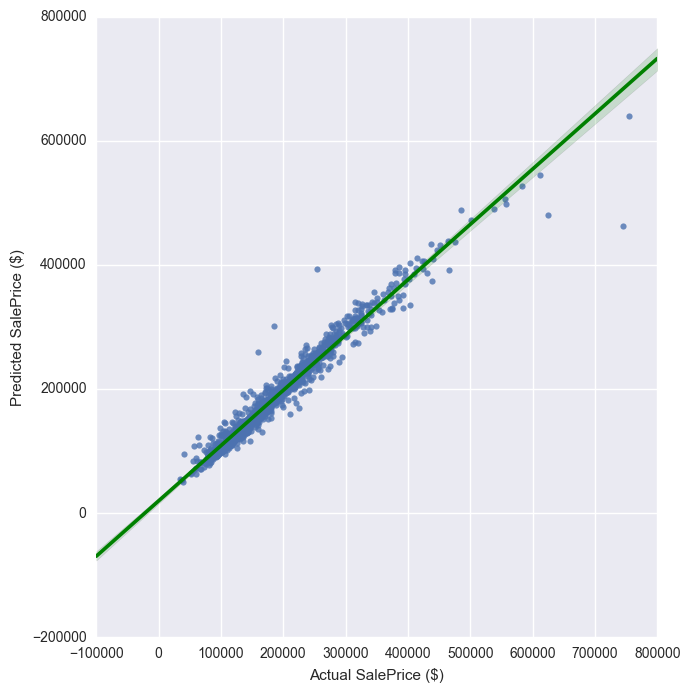

In [78]:
# Plotting Actual SalePrice versus predicted SalePrice
#g = sns.lmplot(x="SalePrice", y="SalePricePrediction", data=HousingDataSale, size=5)
g = sns.lmplot(x="SalePrice", y="SalePricePrediction", data=SalePricedf, line_kws={'color': 'green'}, size=7)
g.set_axis_labels("Actual SalePrice ($)", "Predicted SalePrice ($)")

The Actual and Predicted SalePrice appear almost the same from 50,000 to 400,000 dollars range. The model looks quite good. The variance start to increase slightly and the largest at the outliers that are present above 700,000 dollar mark. As these outliers are 'out of the normal' expectation from the algorithm, this variance is expected.

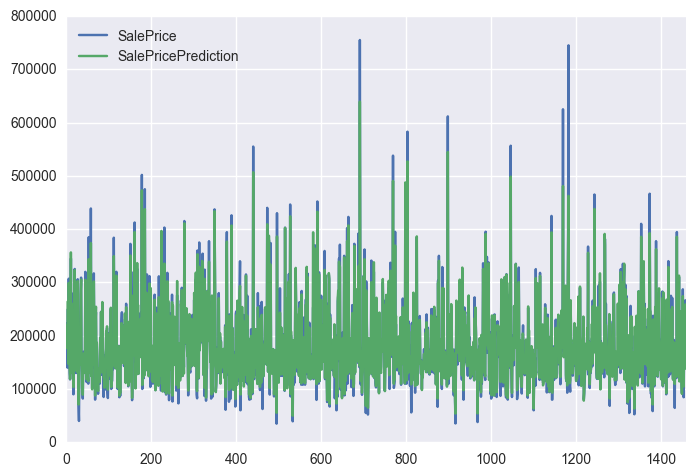

In [200]:
#SalePrice Actual vs SalePricePrediction
SalePricedf.plot()

There is significant overlap between Actual SalePrice (blue) and Predicted SalePrice (green). This is a good sign that the values are close. Larger peaks of variance can be seen for outliers.

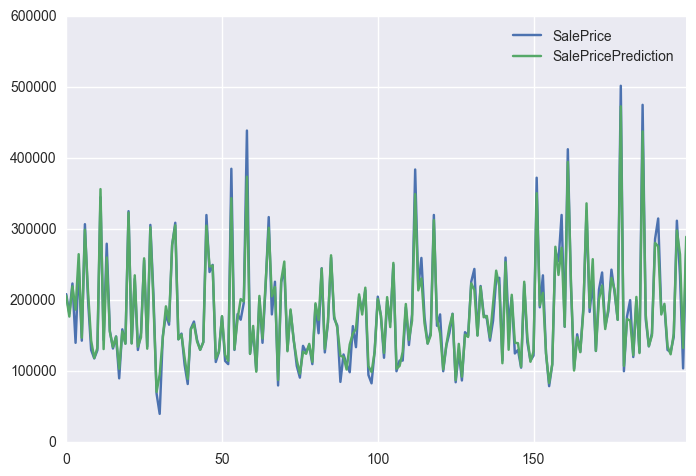

In [201]:
# Zooming in on first 200 rows of dataset
SalePriceHead=SalePricedf.head(200)
SalePriceHead.plot()

Actual and Predicted SalePrice are almost overlapping completely which is a good sign. Variances are small.

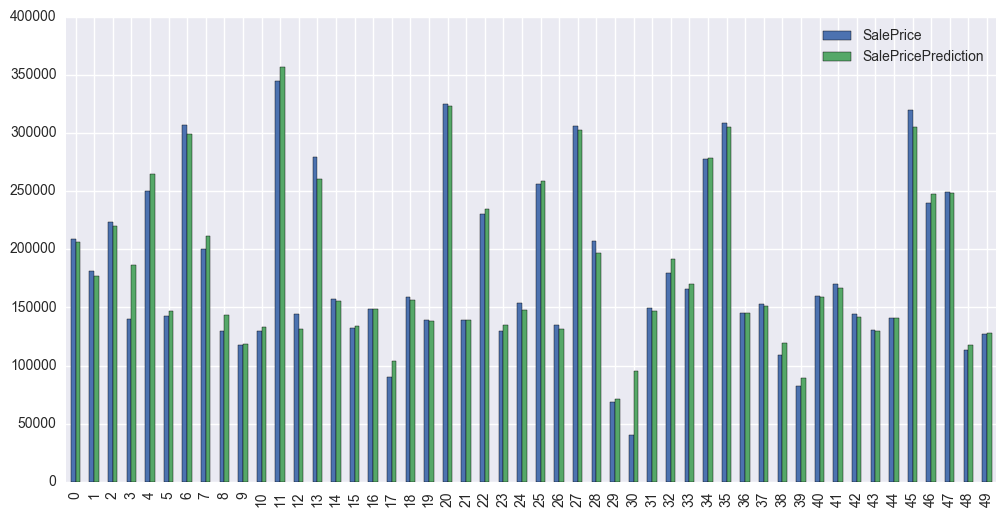

In [202]:
# First 50 rows of dataset
SalePriceHead=SalePricedf.head(50)
SalePriceHead.plot(kind="bar",figsize=(12,6))

This bar graph show that Actual and Predicted SalePrice are extremely close for majority of the datapoints for this sample set of first 50 rows. There is a slightly larger variation for extremely small SalePrice, less than 50,000 dollars. 
Less than 50,000 for a house price is unusual and unlikely to be picked up by the algorithm.

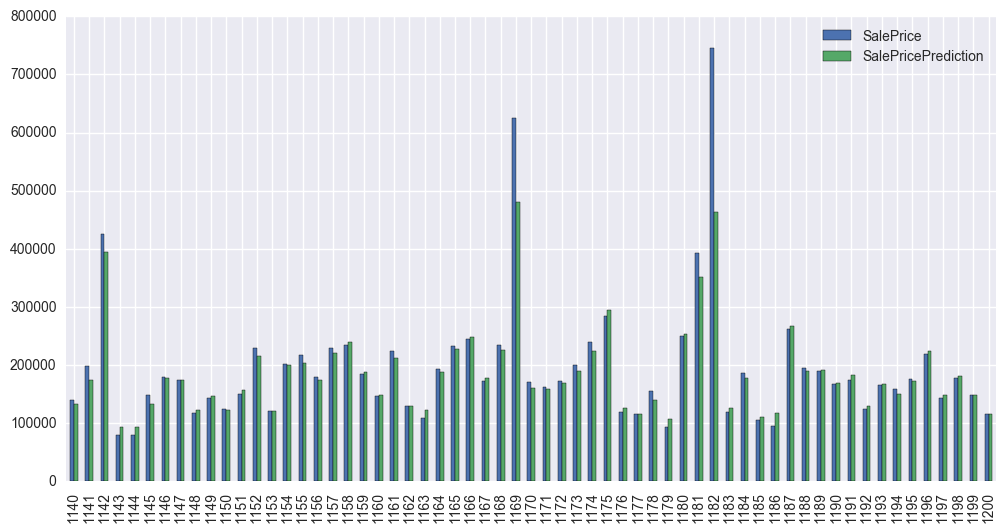

In [208]:
# Middle section of dataset - rows 1139 to 1199
SalePriceSection=SalePricedf.ix[1140:1200]
SalePriceSection.plot(kind="bar",figsize=(12,6))

One large outlier is present in this section at observation 1182. There is larger variance between Actual and Predicted SalePrice, as the algorithm has been established using the pattern from the normal or majority of predictors. This outlier is out of the normal expectations from the algorithm. 

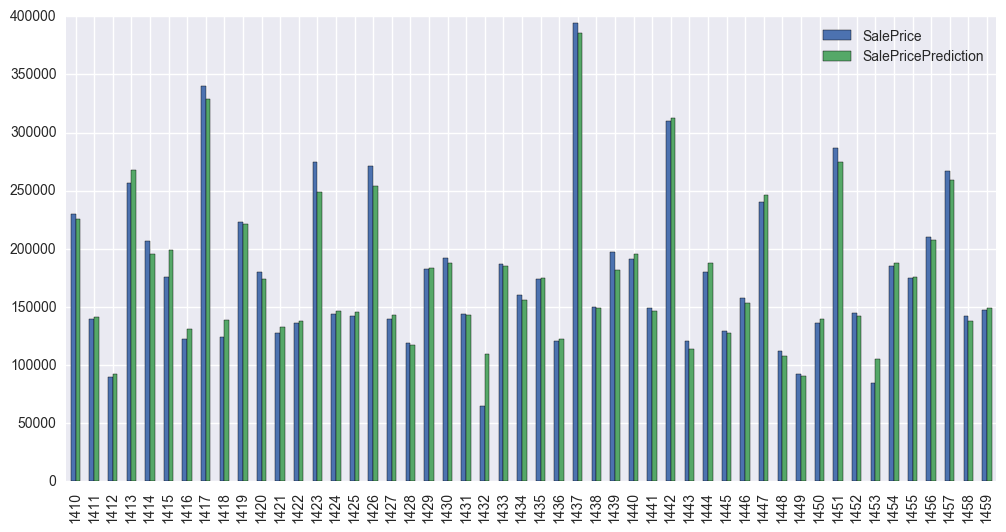

In [209]:
# Last 50 rows from dataset
SalePriceTail=SalePricedf.tail(50)
SalePriceTail.plot(kind="bar",figsize=(12,6))

This bar graph show that Actual and Predicted SalePrice are extremely close for majority of the datapoints for this sample set of last 50 rows. There is a slightly larger variation for extremely small SalePrice, close to 50,000 dollars. 
50,000 for a house price is unusual and unlikely to be picked up by the algorithm.

### Correlation between the most significant features and SalePrice

#### 1. Overall Quality and SalePrice

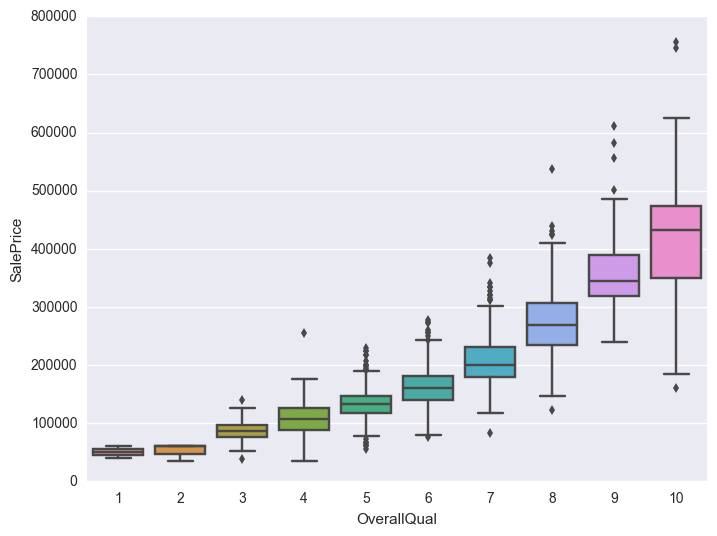

In [216]:
# Plot of OverallQual and SalePrice
plt.figure(figsize=[8,6])
sns.set(font_scale=1)
sns.boxplot(x="OverallQual",y="SalePrice",data=HousingData,)
#sns.swarmplot(x="OverallQual",y="SalePrice",data=HousingData,)

#### Overall Quality and SalePrice Summary

Overall Quality contributed the most to the variance in SalePrice. There is a clear trend upwards in SalePrice for higher quality ratings.

- Overall quality is significant when the rating is 9 or 10. 
- There is an increase in SalePrice of 88,860 and 102,000 dollars in SalePrice for ratings 9 and 10 respectively compared to overall quality rating of 1.

- It is recommended that the Overall Quality of the house to be in excellent condition to maximise SalePrice. 
- The difference of 102,000 dollars in price between poor quality and excellent quality is a significant impact to SalePrice.

#### 2. Year Built and SalePrice

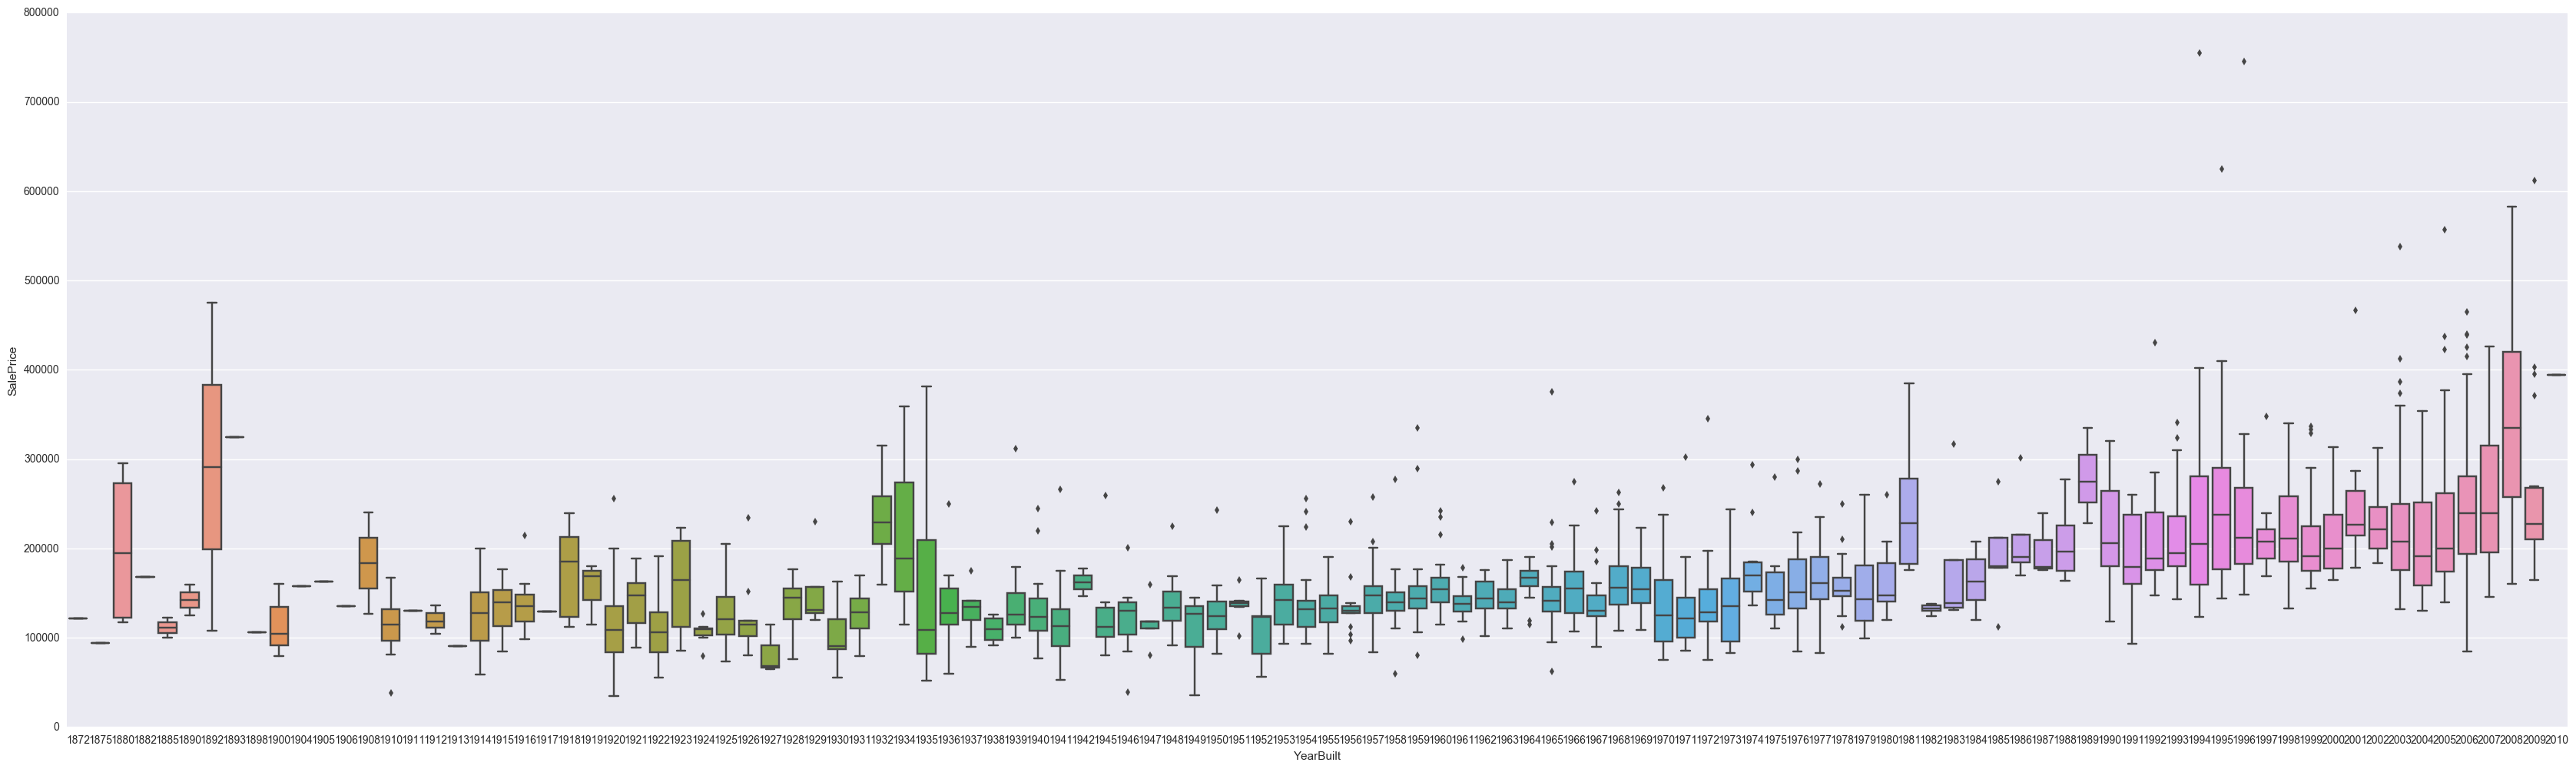

In [235]:
# Plot of YearBuilt and SalePrice
plt.figure(figsize=[42,12])
sns.set(font_scale=1)
sns.boxplot(x="YearBuilt",y="SalePrice",data=HousingData,)

#### Year Built and SalePrice Summary

Majority of the houses built from year 2010 and backwards to year 1908 are quite signficant. There is an increase in SalePrice in the range of 110,200 dollars to 70,000 dollars respectively, when compared to houses built in 1872.

##### Recommendation
- Buyers looking to purchase a cheaper home should look for houses older than year 2000 for a saving around 30,000 dollars 
- Sellers can expect to get an increase in SalePrice of over 100,000 dollars for recent houses built in years 2009, 2008 etc.

Please note: The Housing data has been collected over the years of 2006 to 2010. Therefore 2010 is the most recent data in this dataset. The comparison of SalePrice is made against houses built in 1872.


#### 3. Neighborhood and SalePrice

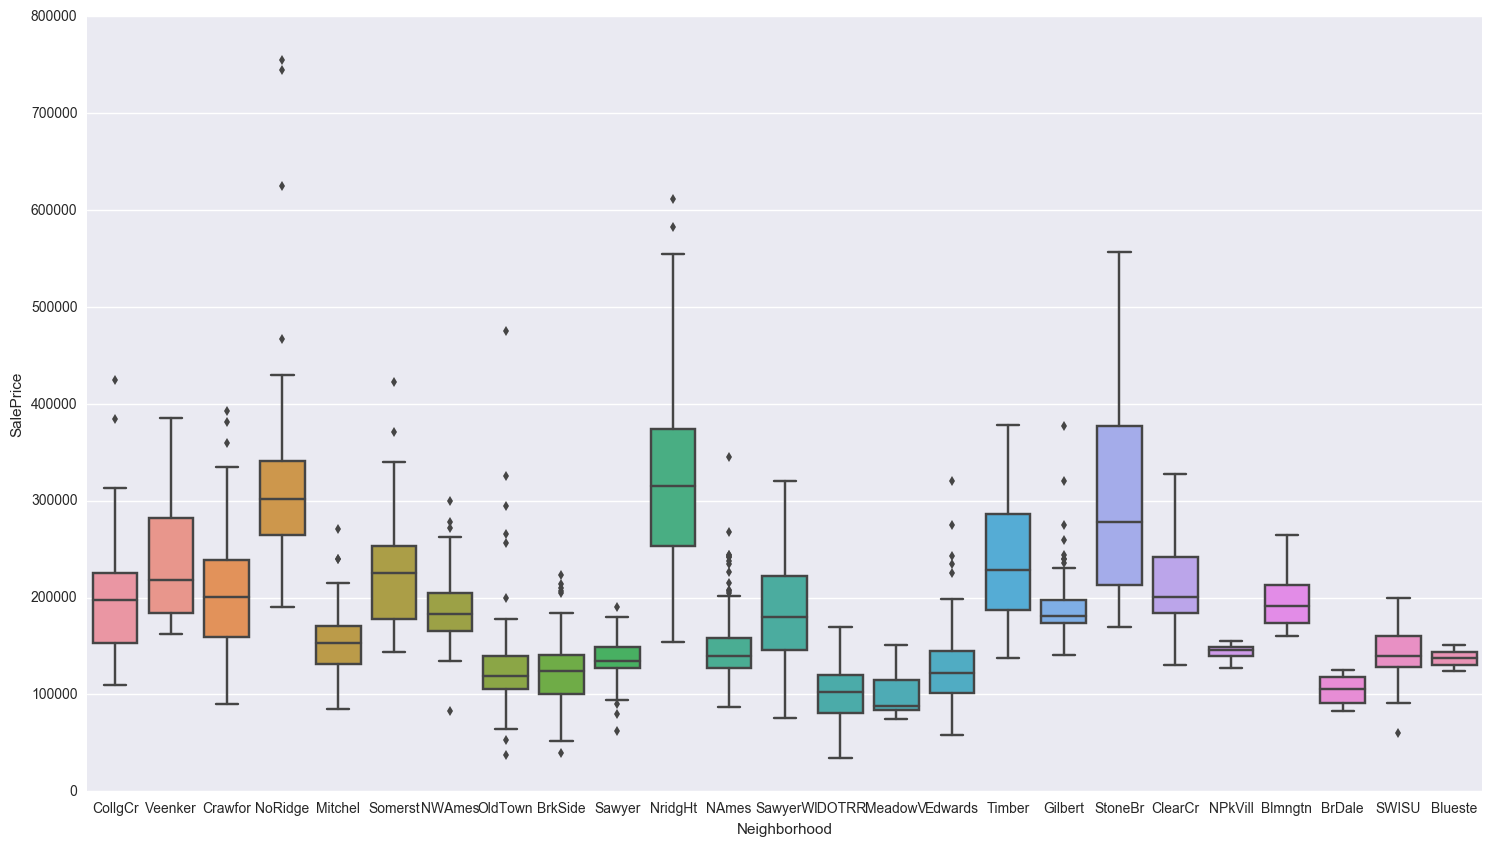

In [214]:
#Plot Neighborhood & SalePrice
plt.figure(figsize=[18,10])
sns.set(font_scale=1)
sns.boxplot(x="Neighborhood",y="SalePrice",data=HousingData,)
#sns.swarmplot(x="Neighborhood",y="SalePrice",data=HousingData,)

#### Neighborhood and SalePrice Summary

- There are some Neighborhoods that are statistically significant. They include ClearCr, CollgCr, Crawford, Gilbert, NoRidge, NridgHt, SomerSt, StoneBr and Veenker
- StoneBr contributes to the largest increase in SalePrice of 53,230 dollars, followed by NoRidge at 52,540 dollars and in the 30,000 range increase by ClearCr, Crawford, NridgHt and Veenker compared to Blmngtn.
- There are no significant Neighborhoods contributing to a decrease in SalePrice compared to Blmngtn.


- It is recommended to invest in Neighborhoods such as StoneBr and NoRidge for a larger increase in SalePrice. 
- Buyers can look at Neighborhoods such as ClearCr, Crawford, NridgHt and Veenker for a medium saving, and Gilbert and Somerset for a larger saving on SalePrice, all compared to Blmngtn.

### Areas where data could improve

- This data has been collected over years 2006 to 2010. More recent data would have given more real-time figures.
- Australian data would also have been more meaningful for the audience. But this data was not available after extensive search on the internet.
- Number of Bedrooms and bathrooms etc are common measures used to evaluate SalePrice. This data was missing from this dataset and would have helped with predictions.
- Area is measured in square feet which is not commonly in Australia. This can be converted to square meters as required.
- There was a large number of categorical variables (61) and a smaller number of continuous variables (20). Continuous variables are quicker to model. It would have been better if the balance was more even.
- There were some null values and outliers in the data which had to be cleaned. This has also skewed the algorithm slightly.

### Conclusion

#### Modeling
- Linear Regression model was initially performed after identifying the features that appeared to be mostly correlated to SalePrice. This resulted in Adjusted R squared value of 0.822 and an RMSE (Root Mean Squared Error) of 32,552 dollars. Adj R squared value appeared good showing that 82.2% of variance in SalePrice were contributed by the features selected. However there was room for RMSE to come down to reduce the gap between Actual and Predicted SalePrice.
- K-fold cross-validation also produced an RMSE in the same vicinity of 34,000 dollars.
- The next refinement step was to reduce RMSE, so that the predicted SalePrice and Actual SalePrice were closer.
- Random Forest Regression model was selected and this resulted in an excellent R squared value of 0.892, an increase of 0.7 from linear model. RMSE also reduced to 26,894 dollars, thereby closing the gap between actual and predicted SalePrice by a further 5,658 dollars.
- Random Forest model was used for prediction because of better accuracy.
- Linear Regression model was repeated using the most important features from Random Forest inorder to understand the details of the correlation between independent and dependent variable (eg: p-value, coe-efficient etc).

#### Ames Housing
- Overall Quality, Year the house is Built and Neighborhood are the most signficant factors contributing to the change in SalePrice of Housing in Ames Housing, Iowa.
- 3 Car Garage, excellent kitchen and exterior quality also contribute to increase in SalePrice. However 3 Fireplaces reduced the SalePrice compared to smaller number of Fireplaces.
- Keeping the quality of the house in an excellent condition (inside & outside), a newer home in a reputable neighborhood are all factors to consider and research before buying or selling a home at Ames.